# GDP per capita

http://data.worldbank.org/indicator/NY.GDP.PCAP.CD  
http://api.worldbank.org/v2/en/indicator/ny.gdp.pcap.cd?downloadformat=excel

## Import the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn
import xlwings as xw

## Connect to the active Excel workbook (GDP_per_capita.xls)

In [3]:
wb = xw.Workbook.active()
wb

<Workbook 'GDP_per_capita.xls'>

## Read the data

In [4]:
data = xw.Range(1, 'B4').options(pd.DataFrame,
                                 expand='table').value

In [5]:
meta = xw.Range(2, 'A1:D1').options(pd.DataFrame,
                                    expand='vertical',
                                    index=False).value.set_index('Country Code')

## Check it

In [6]:
data.head()

,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24015.420612,25921.538234,27549.889422,24640.421244,24289.141516,25353.787545,NaN,NaN,NaN,NaN
AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42417.229146,47253.529796,46735.999575,42701.447136,39639.386021,41630.052579,39666.369215,42806.522553,NaN,NaN
AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.787681,59.890037,58.505995,78.802587,82.231395,101.321627,137.946783,161.384702,...,280.245644,380.400955,384.131681,458.955782,569.940729,622.379654,690.842629,666.795051,633.569247,NaN
AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2825.073490,3402.145980,4462.125351,3565.181589,3928.824514,5053.738649,5531.776299,5900.529570,NaN,NaN
ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3005.012903,3603.013685,4370.539647,4114.136545,4094.358832,4437.811999,4247.485437,4411.258241,4564.390339,NaN


In [7]:
meta.head()

,Country Name,Region,IncomeGroup
Country Code,,,
ABW,Aruba,Latin America & Caribbean,High income: nonOECD
AFG,Afghanistan,South Asia,Low income
AGO,Angola,Sub-Saharan Africa,Upper middle income
ALB,Albania,Europe & Central Asia,Upper middle income
AND,Andorra,Europe & Central Asia,High income: nonOECD


## Joining

In [8]:
combined = pd.concat([meta, data],
                     axis=1,
                     join='inner')
combined

,Country Name,Region,IncomeGroup,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Latin America & Caribbean,High income: nonOECD,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,24015.420612,25921.538234,27549.889422,24640.421244,24289.141516,25353.787545,NaN,NaN,NaN,NaN
AND,Andorra,Europe & Central Asia,High income: nonOECD,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,42417.229146,47253.529796,46735.999575,42701.447136,39639.386021,41630.052579,39666.369215,42806.522553,NaN,NaN
AFG,Afghanistan,South Asia,Low income,GDP per capita (current US$),NY.GDP.PCAP.CD,59.787681,59.890037,58.505995,78.802587,82.231395,...,280.245644,380.400955,384.131681,458.955782,569.940729,622.379654,690.842629,666.795051,633.569247,NaN
AGO,Angola,Sub-Saharan Africa,Upper middle income,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,2825.073490,3402.145980,4462.125351,3565.181589,3928.824514,5053.738649,5531.776299,5900.529570,NaN,NaN
ALB,Albania,Europe & Central Asia,Upper middle income,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,3005.012903,3603.013685,4370.539647,4114.136545,4094.358832,4437.811999,4247.485437,4411.258241,4564.390339,NaN
ARB,Arab World,None,None,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,4358.297285,4985.822104,6171.031285,5209.144916,5955.064756,6911.566859,7465.145864,7498.228102,7386.428444,NaN
ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,42950.100584,42913.784034,45720.017898,32905.053849,34341.911292,39901.220916,41712.124211,42831.089132,43962.713693,NaN
ARG,Argentina,Latin America & Caribbean,High income: nonOECD,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,1148.579957,845.076989,1166.317559,...,6639.909435,8239.137161,9999.093517,9231.382900,11198.642567,13392.916904,14357.411589,14443.065651,12509.531118,NaN
ARM,Armenia,Europe & Central Asia,Lower middle income,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,2126.618661,3080.970959,3919.975474,2915.583906,3124.784018,3417.171836,3565.517575,3716.828923,3873.533566,NaN


## Quick view

In [9]:
xw.view(combined)

## Summary Statistics

In [10]:
regions = combined.groupby('Region')['2014']
summary = regions.describe().unstack()
summary

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,30.0,16374.255832,23535.502908,1094.576688,2419.247079,4121.683521,23947.790813,96038.050724
Europe & Central Asia,49.0,26186.051959,26454.656191,1114.007483,7378.463950,15719.242021,46331.977410,116664.262488
Latin America & Caribbean,31.0,8947.742480,5495.213680,824.159773,4772.000432,7647.529548,12229.191130,22217.494139
Middle East & North Africa,18.0,19156.275747,24096.033452,1813.596566,4671.166545,6496.879535,24681.651362,96732.402545
North America,2.0,52432.440338,3107.104737,50235.385509,51333.912923,52432.440338,53530.967753,54629.495168
South Asia,8.0,2416.915612,2361.006745,633.569247,990.525325,1449.062406,2875.165464,7635.484151
Sub-Saharan Africa,45.0,2616.116266,4012.709964,255.044570,585.622683,1024.668452,1875.843287,18918.276831


## Plotting

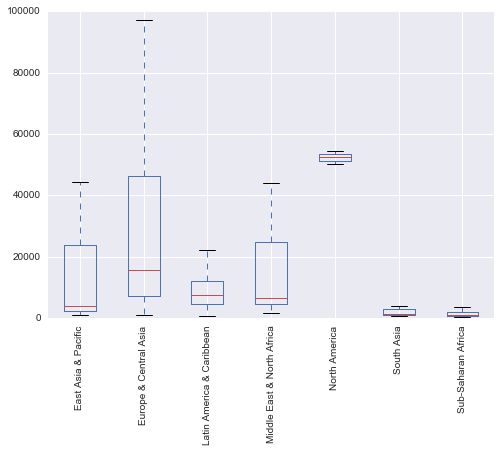

In [11]:
unstacked = combined.set_index([combined.index,
                                'Region'])['2014'].unstack().drop(np.nan, 1)
ax = unstacked.plot(kind='box',
                    rot=90,
                    ylim=(0, 100000),
                    return_type='axes')

## Write the results back to Excel

In [ ]:
xw.Sheet.add('2014', wkb=wb)

In [ ]:
xw.Range('A1').value = 'GDP per capita 2014'
xw.Range('A2').value = summary.round(2)

In [ ]:
xw.Sheet('2014').autofit()

In [ ]:
fig = ax.get_figure()
xw.Plot(fig).show('GDP_PC_2014',
                  top=xw.Range('A12').top,
                  wkb=wb)